# Parking Data Analytics
###### by Simon Huang (27067380)

## Questions
### Main question
* Does the population density affect the amount of tickets issued?

### Minor questions
* Is there a monthly ticket quotas for agents issuing them?

* Does the population age affect the amount of tickets issued?

## Data Set Sources
##### Los Angeles Parking Citations
https://www.kaggle.com/cityofLA/los-angeles-parking-citations

This dataset is constantly being updated on a daily basis. The version I have was downloaded on June 4, 2019. The data contains parking tickets issued in the city of LA since 2015. It also has the coordinates of where the ticket was given

##### 2010 Census Populations by Zip Code
https://data.lacity.org/dataset/2010-Census-Populations-by-Zip-Code/nxs9-385f

This is the most recent data set about Los Angeles' country population. The next census will happen in 2020. The data contains data about the total population, age, sex, and households

##### Zip Codes in Southern California
https://controllerdata.lacity.org/dataset/Zip-Code-Areas/9uax-58sb

This data contains the geometric area of all Zip codes in Southern California.

##### Los Angeles City Zip Codes
http://geohub.lacity.org/datasets/875d540d71e64b8696cc368865c2b640_0

This data contains only Zip codes of the city of Los Angeles. It also has the data about area in square miles.

# Acquiring and Loading Data
The data cannot be fetched directly using the `urllib` module. We are assuming that all the data is available locally.

The data sets are placed in the following directories:

`data\raw\los-angeles-parking-citations\parking-citations.csv`

`data\raw\2010_Census_Populations_by_Zip_Code.csv`

`data\raw\Zip Code Areas.geojson`

`data\raw\Zip Code Areas.geojson`

`data\raw\Intersect_of_City_Boundary_and_Zip_Codes_LA_County.csv`

*Note that `parking-citations.csv` is very large (~1.3GB) and may take time to load*

In [78]:
# Initial setup
import pandas as pd
import numpy as np

# For plotting
%matplotlib inline
import matplotlib.pyplot as plt

# Removing scientific notation from prints for a better visualization
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
parking_data = pd.read_csv("./data/raw/los-angeles-parking-citations/parking-citations.csv")
parking_data.head()

# A warning may occur due to the large size of the .csv

C:\Users\Simon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.000,NaN,nan,CA,200304.000,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.000,4000A1,NO EVIDENCE OF REG,50.000,99999.000,99999.000
1,1103700150,2015-12-21T00:00:00,1435.000,NaN,nan,CA,201512.000,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.000,4000A1,NO EVIDENCE OF REG,50.000,99999.000,99999.000
2,1104803000,2015-12-21T00:00:00,2055.000,NaN,nan,CA,201503.000,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.000,8939,WHITE CURB,58.000,6439997.900,1802686.400
3,1104820732,2015-12-26T00:00:00,1515.000,NaN,nan,CA,nan,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.000,000,17104h,nan,6440041.100,1802686.200
4,1105461453,2015-09-15T00:00:00,115.000,NaN,nan,CA,200316.000,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.000,8069A,NO STOPPING/STANDING,93.000,99999.000,99999.000


In [3]:
population_data = pd.read_csv("./data/raw/2010_Census_Populations_by_Zip_Code.csv")
population_data.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.500,0,1,1,1.000
1,90001,57110,26.600,28468,28642,12971,4.400
2,90002,51223,25.500,24876,26347,11731,4.360
3,90003,66266,26.300,32631,33635,15642,4.220
4,90004,62180,34.800,31302,30878,22547,2.730


The zip code areas data is formatted in `geojson`. We need to use the `geopandas` module instead of the regular one.

`geopandas` can be installed using the command `conda install geopandas`

In [4]:
import geopandas as gpd

In [5]:
zip_data = gpd.read_file('./data/raw/Zip Code Areas.geojson')
zip_data.head()

,external_i,name,mtfcc10,display_na,intptlat10,set,awater10,slug,zcta5ce10,funcstat10,aland10,geoid10,kind,intptlon10,classfp10,geometry
0,90001,90001,G6350,90001 ZIP Code Tabulation Area (2012),+33.9740268,ZIP Code Tabulation Areas (2012),0,90001-zip-code-tabulation-area-2012,90001,S,9071359,90001,ZIP Code Tabulation Area (2012),-118.2495088,B5,(POLYGON ((-118.2651510000001 33.9702490000000...
1,90002,90002,G6350,90002 ZIP Code Tabulation Area (2012),+33.9490988,ZIP Code Tabulation Areas (2012),0,90002-zip-code-tabulation-area-2012,90002,S,7930684,90002,ZIP Code Tabulation Area (2012),-118.2467371,B5,(POLYGON ((-118.2373700000001 33.9585210000000...
2,90003,90003,G6350,90003 ZIP Code Tabulation Area (2012),+33.9641307,ZIP Code Tabulation Areas (2012),403,90003-zip-code-tabulation-area-2012,90003,S,9197637,90003,ZIP Code Tabulation Area (2012),-118.2727831,B5,(POLYGON ((-118.2651740000001 33.9818280000000...
3,90004,90004,G6350,90004 ZIP Code Tabulation Area (2012),+34.0761981,ZIP Code Tabulation Areas (2012),0,90004-zip-code-tabulation-area-2012,90004,S,7894525,90004,ZIP Code Tabulation Area (2012),-118.3107225,B5,(POLYGON ((-118.3116010000001 34.0689580000000...
4,90005,90005,G6350,90005 ZIP Code Tabulation Area (2012),+34.0591634,ZIP Code Tabulation Areas (2012),0,90005-zip-code-tabulation-area-2012,90005,S,2807559,90005,ZIP Code Tabulation Area (2012),-118.3068924,B5,(POLYGON ((-118.2916380000001 34.0617930000000...


In [6]:
la_city_zip = pd.read_csv('data/raw/Intersect_of_City_Boundary_and_Zip_Codes_LA_County.csv')
la_city_zip.head()

,OBJECTID,CITY,ZIPCODE,ZIP,TOOLTIP,NLA_URL,AnalysisArea
0,1,IN,90001,90001,Zip Code: 90001,n,0.928
1,2,IN,90002,90002,Zip Code: 90002,n,2.045
2,3,IN,90003,90003,Zip Code: 90003,n,3.682
3,4,IN,90004,90004,Zip Code: 90004,n,3.012
4,5,IN,90005,90005,Zip Code: 90005,n,1.324


# Data Sets Cleaning

### Checking if any null values are present

In [7]:
parking_data.isnull().sum()

Ticket number                  0
Issue Date                   568
Issue time                  2925
Meter Id                 7031696
Marked Time              9163348
RP State Plate               765
Plate Expiry Date         866347
VIN                      9459249
Make                        9521
Body Style                  9930
Color                       4523
Location                     938
Route                      70783
Agency                       578
Violation code                 0
Violation Description       1011
Fine amount                 7126
Latitude                       4
Longitude                      4
dtype: int64

In [8]:
population_data.isnull().sum()

Zip Code                  0
Total Population          0
Median Age                0
Total Males               0
Total Females             0
Total Households          0
Average Household Size    0
dtype: int64

In [9]:
zip_data.isnull().sum()

external_i    0
name          0
mtfcc10       0
display_na    0
intptlat10    0
set           0
awater10      0
slug          0
zcta5ce10     0
funcstat10    0
aland10       0
geoid10       0
kind          0
intptlon10    0
classfp10     0
geometry      0
dtype: int64

In [10]:
la_city_zip.isnull().sum()

OBJECTID        0
CITY            0
ZIPCODE         0
ZIP             0
TOOLTIP         0
NLA_URL         0
AnalysisArea    0
dtype: int64

## Cleaning Parking Ticket Data

We notice that only `parking_data` has null values. 

However, not all missing values in this column are declared as NaN. 

For example, from a quick look on the `longitude` and `latitude`, some missing values are displayed as 99999

In [11]:
parking_data['Longitude'].value_counts()

99999.000      1400782
1819688.456       8610
1859071.166       7610
1882601.871       5720
1849114.300       5041
1859071.200       4795
1849114.334       4401
1836817.208       4326
1849114.334       4215
1864751.557       4196
1883363.553       3843
1852080.794       3560
1837269.893       3527
1845112.570       3521
1819197.428       3483
1876409.078       3481
1840433.993       3481
1849336.560       3397
1845451.300       3327
1845451.348       3305
1848423.248       3271
1858229.000       3222
1857542.012       3185
1857542.000       3185
1858835.417       3155
1859516.042       3089
1848423.200       3049
1882601.900       2995
1803997.602       2890
1819197.428       2866
                ...   
1832483.744          1
1840585.351          1
1934631.030          1
1903949.900          1
1848483.584          1
1883095.633          1
1861520.860          1
1801712.181          1
1839372.809          1
1903982.400          1
1844281.500          1
1808854.681          1
1869526.494

In [12]:
parking_data['Latitude'].value_counts()

99999.000      1400782
6463689.998       8616
6419828.962       8610
6463690.000       8374
6458312.392       7610
6462120.700       6857
6421105.622       6349
6463689.894       5991
6448999.196       5720
6461453.800       5642
6458312.400       4718
6463689.900       4430
6449300.792       4269
6457731.227       4252
6485641.284       4191
6470141.350       4043
6486945.410       3946
6449000.204       3843
6483074.281       3686
6457731.200       3671
6439920.110       3606
6427692.586       3494
6447001.322       3481
6421785.514       3481
6419538.332       3413
6486375.314       3403
6427279.079       3402
6457482.263       3397
6426797.900       3319
6418423.925       3284
                ...   
6467380.257          1
6472132.826          1
6501687.343          1
6473338.888          1
6461748.297          1
6435571.500          1
6475620.235          1
6435555.500          1
6463217.786          1
6435543.500          1
6435394.000          1
6466395.262          1
6435676.500

From the unique counts of longitude and latitude, we notice that there is an equal number of entries with the value of 99999

Also, since longitude and latitude describe a specific location (Los Angeles in our case), we can assume that those values should be close together within a certain range. Therefore, any values that are out of range would be considered erroneous

We can double check with quartiles, mean, min and max

In [13]:
parking_data['Longitude'].describe()

count      9475554.000
mean       1590978.489
std        1988562.739
min          99999.000
25%        1821960.801
50%        1842024.540
75%        1858208.220
max     4042322160.000
Name: Longitude, dtype: float64

In [14]:
parking_data['Latitude'].describe()

count      9475554.000
mean       5517048.968
std        2941144.952
min          99999.000
25%        6421784.451
50%        6451852.197
75%        6475138.037
max     4042322160.000
Name: Latitude, dtype: float64

From the data above, we notice that the values for 25%, 50%, and 75% quartiles are very close together. However, the minimum and maximum values are really far away from the quartiles. We can assume those values are erroneous.

For longitude, we can assume that the valid range should be in the 1 000 000 range

For latitude, we can assume that the valid range should be in the 6 000 000 range

In [15]:
len(parking_data[(parking_data['Latitude'] < 6000000) | 
             (parking_data['Latitude'] >= 7000000)]
   )

1400785

In [16]:
len(parking_data[(parking_data['Longitude'] < 1000000) | 
             (parking_data['Longitude'] >= 2000000)]
   )

1400952

In [17]:
len(parking_data)

9475558

From the results above, there would be around 1 400 000 invalid entries out of 9 400 000 entries. We can create a new variable with filtered out results. We can then do further cleaning from there.

In [18]:
parking_data_clean = parking_data[((parking_data['Latitude'] >= 6000000) &
                                 (parking_data['Latitude'] < 7000000)) |
                                 ((parking_data['Longitude'] >= 1000000) &
                                 (parking_data['Longitude'] < 2000000))]

In [19]:
parking_data_clean.isnull().sum()

Ticket number                  0
Issue Date                     0
Issue time                  1362
Meter Id                 5757395
Marked Time              7795803
RP State Plate               580
Plate Expiry Date         749403
VIN                      8059753
Make                        4740
Body Style                  4167
Color                       1667
Location                       0
Route                      35761
Agency                         5
Violation code                 0
Violation Description        390
Fine amount                 3032
Latitude                       0
Longitude                      0
dtype: int64

We notice that there are now no null values for latitude and longitude.

There are entries that contains a large amount of NaN but the column is not useful for the analysis of our questions. Rows such as `Meter Id`, `Marked Time`, `Plate Expiry Date`, `VIN`, and `Route` can be dropped.

In [20]:
parking_data_clean = parking_data_clean.drop(columns=['Meter Id', 'Marked Time', 'Plate Expiry Date', 'VIN', 'Route'])

From here, we can drop all NaN values since we have a very large data set

In [21]:
parking_data_clean = parking_data_clean.dropna()

In [22]:
parking_data_clean.isnull().sum()

Ticket number            0
Issue Date               0
Issue time               0
RP State Plate           0
Make                     0
Body Style               0
Color                    0
Location                 0
Agency                   0
Violation code           0
Violation Description    0
Fine amount              0
Latitude                 0
Longitude                0
dtype: int64

In [23]:
parking_data_clean['Ticket number'].duplicated().sum()

0

There are no NaN values or duplicated entries in the parking data

In [24]:
parking_data_clean.dtypes

Ticket number             object
Issue Date                object
Issue time               float64
RP State Plate            object
Make                      object
Body Style                object
Color                     object
Location                  object
Agency                   float64
Violation code            object
Violation Description     object
Fine amount              float64
Latitude                 float64
Longitude                float64
dtype: object

There are values that has a wrong data type such as `Issue Date`(datetime64) `Issue Time`(int64), and `Agency`(int64)

In [25]:
parking_data_clean['Issue Date'] = parking_data_clean['Issue Date'].astype('datetime64')
parking_data_clean['Issue time'] = parking_data_clean['Issue time'].astype('int64')
parking_data_clean['Agency'] = parking_data_clean['Agency'].astype('int64')
parking_data_clean.dtypes

Ticket number                    object
Issue Date               datetime64[ns]
Issue time                        int64
RP State Plate                   object
Make                             object
Body Style                       object
Color                            object
Location                         object
Agency                            int64
Violation code                   object
Violation Description            object
Fine amount                     float64
Latitude                        float64
Longitude                       float64
dtype: object

In [26]:
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
2,1104803000,2015-12-21,2055,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400
33,1108321723,2015-12-21,1041,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100
43,1109455266,2015-12-26,1815,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000
44,1109455270,2015-12-27,1815,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000
45,1109455745,2015-12-23,2140,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500


## Cleaning and normalizing population data
We first check if the correct data types are used

In [27]:
population_data.dtypes

Zip Code                    int64
Total Population            int64
Median Age                float64
Total Males                 int64
Total Females               int64
Total Households            int64
Average Household Size    float64
dtype: object

The data types are correct for all the columns

In [28]:
population_data.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000,319.000,319.000,319.000,319.000,319.000,319.000
mean,91000.674,33241.342,36.528,16391.564,16849.777,10964.571,2.828
std,908.360,21644.417,8.693,10747.496,10934.986,6270.646,0.836
min,90001.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,90243.500,19318.500,32.400,9763.500,9633.500,6765.500,2.435
50%,90807.000,31481.000,37.100,15283.000,16202.000,10968.000,2.830
75%,91417.000,44978.000,41.000,22219.500,22690.500,14889.500,3.320
max,93591.000,105549.000,74.000,52794.000,53185.000,31087.000,4.670


The values seem to be consistent as there is a fluctuation between the population. The minimum value of 0 is justified as there are ZIP code areas where there are no residents

In [29]:
park_sample = parking_data_clean.sample(100)

In [30]:
population_data[(population_data['Total Population'] == 0)]

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
64,90079,0,0.000,0,0,0,0.000
66,90090,0,0.000,0,0,0,0.000
119,90506,0,0.000,0,0,0,0.000
153,90747,0,0.000,0,0,0,0.000
167,90831,0,0.000,0,0,0,0.000
252,91608,0,0.000,0,0,0,0.000


90079: Seems to be a mall in downtown LA

90090: Dodgers Stadium

90506: El Camino College

90747: California State University Dominguez Hills

90831: A block of commercial buildings

91608: A block of commercial buildings

From those results, we can see that some areas are not necessarily a residential area. This can skew some of our results in later analysis. We may need to determine the minimum amount of population before further analysis. 

The data seems to be cleaned and normalized for the moment

In [32]:
population_data_clean = population_data.copy()
population_data_clean.head()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,91371,1,73.500,0,1,1,1.000
1,90001,57110,26.600,28468,28642,12971,4.400
2,90002,51223,25.500,24876,26347,11731,4.360
3,90003,66266,26.300,32631,33635,15642,4.220
4,90004,62180,34.800,31302,30878,22547,2.730


## Cleaning and normalizing ZIP data

The only columns that we are interested are the ZIP code and the geometry. We will use the geometry data to calculate the area and also check if any of the parking ticket location falls into the area, thus determining the ZIP code. From there, we have the population data of the ZIP code in `population_data_clean`

In [33]:
zip_data_clean = zip_data[['name', 'geometry']]

In [34]:
zip_data_clean.dtypes

name        object
geometry    object
dtype: object

In [35]:
zip_data_clean['name'] = zip_data_clean['name'].astype('int64')

C:\Users\Simon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
zip_data_clean.dtypes

name         int64
geometry    object
dtype: object

We have converted the ZIP data type to int64, the same data type from `population_data`

We are renaming `name` to `Zip Code` to match the column in `population_data`

In [37]:
zip_data_clean = zip_data_clean.rename(columns={'name':'Zip Code'})
zip_data_clean.head()

,Zip Code,geometry
0,90001,(POLYGON ((-118.2651510000001 33.9702490000000...
1,90002,(POLYGON ((-118.2373700000001 33.9585210000000...
2,90003,(POLYGON ((-118.2651740000001 33.9818280000000...
3,90004,(POLYGON ((-118.3116010000001 34.0689580000000...
4,90005,(POLYGON ((-118.2916380000001 34.0617930000000...


## Cleaning and normalizing Los Angeles ZIP data

There are many columns we don't need for our analysis

In [38]:
la_city_zip.head()

,OBJECTID,CITY,ZIPCODE,ZIP,TOOLTIP,NLA_URL,AnalysisArea
0,1,IN,90001,90001,Zip Code: 90001,n,0.928
1,2,IN,90002,90002,Zip Code: 90002,n,2.045
2,3,IN,90003,90003,Zip Code: 90003,n,3.682
3,4,IN,90004,90004,Zip Code: 90004,n,3.012
4,5,IN,90005,90005,Zip Code: 90005,n,1.324


We are only interested in `ZIPCODE` and `AnalysisArea`. The other columns can be dropped.

We will also rename the columns `ZIPCODE` to `Zip Code` and `AnalysisArea` to `Area`

In [39]:
la_city_zip_clean = la_city_zip[['ZIPCODE', 'AnalysisArea']]
la_city_zip_clean = la_city_zip_clean.rename(columns = {'ZIPCODE': 'Zip Code', 'AnalysisArea': 'Area'})
la_city_zip_clean.head()

,Zip Code,Area
0,90001,0.928
1,90002,2.045
2,90003,3.682
3,90004,3.012
4,90005,1.324


## Enriching data about the population and zip codes

We now want to merge `zip_data_clean`, `la_city_zip_clean`, and `population_data_clean`.

`la_city_zip_clean` should be the primary DataFrame that we are interested in since it focuses only on Zip codes within the city of Los Angeles

We will first merge `zip_data_clean` with `population_data_clean`

We will be using geopanda's merge since there are polygon data

In [56]:
population_zip_merge = zip_data_clean.merge(population_data_clean, on='Zip Code')
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
0,90001,(POLYGON ((-118.2651510000001 33.9702490000000...,57110,26.600,28468,28642,12971,4.400
1,90002,(POLYGON ((-118.2373700000001 33.9585210000000...,51223,25.500,24876,26347,11731,4.360
2,90003,(POLYGON ((-118.2651740000001 33.9818280000000...,66266,26.300,32631,33635,15642,4.220
3,90004,(POLYGON ((-118.3116010000001 34.0689580000000...,62180,34.800,31302,30878,22547,2.730
4,90005,(POLYGON ((-118.2916380000001 34.0617930000000...,37681,33.900,19299,18382,15044,2.500


In [57]:
len(population_zip_merge)

319

There are currently 319 entries about the Zip code. We are only interested in Zip codes that are part of the city of Los Angeles so we will make an inner join with `la_city_zip_clean`

In [58]:
population_zip_merge = population_zip_merge.merge(la_city_zip_clean, on='Zip Code')
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Area
0,90001,(POLYGON ((-118.2651510000001 33.9702490000000...,57110,26.600,28468,28642,12971,4.400,0.928
1,90002,(POLYGON ((-118.2373700000001 33.9585210000000...,51223,25.500,24876,26347,11731,4.360,2.045
2,90003,(POLYGON ((-118.2651740000001 33.9818280000000...,66266,26.300,32631,33635,15642,4.220,3.682
3,90004,(POLYGON ((-118.3116010000001 34.0689580000000...,62180,34.800,31302,30878,22547,2.730,3.012
4,90005,(POLYGON ((-118.2916380000001 34.0617930000000...,37681,33.900,19299,18382,15044,2.500,1.324


In [59]:
len(population_zip_merge)

156

There are now 156 entries

## Normalizing coordinate system

We need to convert the `geometry` column to a proper format for display

In our parking data tickets, the latitude and longitude and represented in an unconventional way. According to the website of the data provider: `Parking citations with latitude / longitude (XY) in US Feet coordinates according to the NAD_1983_StatePlane_California_V_FIPS_0405_Feet projection.`

After looking around, the original coordinate system is specified here: https://epsg.io/102645

The current representation of all polygon data in the `geometry` column of `population_zip_merge` is represented with WSG84 (EPSG:4326): https://spatialreference.org/ref/epsg/wgs-84/

We will convert all the polygon data from `EPSG:4326` to the representation used in ticket data.

Converting here is more efficient since we are working with a few hundreds of entries vs millions of entries

In [60]:
#PROJ.4 string from: https://epsg.io/102645

# Initial projection
population_zip_merge.crs = {'init' :'epsg:4326'}

# Converted projection
population_zip_merge = population_zip_merge.to_crs("+proj=lcc +lat_1=34.03333333333333 +lat_2=35.46666666666667 +lat_0=33.5 +lon_0=-118 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs")

population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Area
0,90001,"(POLYGON ((6481270.579961202 1811661.16739264,...",57110,26.600,28468,28642,12971,4.400,0.928
1,90002,(POLYGON ((6489683.924914364 1807372.052575295...,51223,25.500,24876,26347,11731,4.360,2.045
2,90003,(POLYGON ((6481274.722728484 1815875.014007184...,66266,26.300,32631,33635,15642,4.220,3.682
3,90004,(POLYGON ((6467297.936404332 1847623.596129704...,62180,34.800,31302,30878,22547,2.730,3.012
4,90005,(POLYGON ((6473336.171649781 1844997.983947916...,37681,33.900,19299,18382,15044,2.500,1.324


## Further data enriching with parking ticket data

We want to see how many parking tickets are given depending on the area. We will run a script that we check every individual points and map them into their appropriate ZIP area.

We will use the `shaperly` module to help us plot the data and manipulate geopandas geometry.

`conda install -c conda-forge shapely`

In [61]:
from shapely.geometry import Point, MultiPolygon

We create a function that will return `true` if a point is in the `polygon`, `false` otherwise

In [62]:
def point_is_in(lat, long, geometry):
    p1 = Point(lat, long)
    poly = MultiPolygon(geometry)
    return p1.within(poly)

Since we need to compare a single point to many polygons, using nested loops to compare all points to all polygons is extremely inefficient. We will use an R-tree data structure that will lower the time complexity.

In [63]:
from rtree import index

We populate the polygon data into the R-tree

In [64]:
idx = index.Index()

# Create spatial index
for i, r in population_zip_merge.iterrows():
    idx.insert(i, r['geometry'].bounds)

We create a function that will return the index of the polygon based on a point

In [67]:
def geometry_location(lat, long):
    # Intersection returns a list of possible polygons of the point
    # We will have to check each of them until we find the real intersection
    for x in list(idx.intersection((lat, long))):
        if point_is_in(lat, long, population_zip_merge['geometry'][x]):
            return population_zip_merge['Zip Code'][x]
            break
    return -1 # If there are no Zip code associated with the ticket

# geometry_location(6447406.010, 1896597.226)

We use the `apply` function to create a new row that we map the appropriate ZIP code to the ticket.

***Running the cell below may take over an hour***

To save time in the future, we will save the new `parking_data_clean` to the hard drive.

```
import time
start_time = time.time()

parking_data_clean['Zip Code'] = parking_data_clean.apply(lambda x: geometry_location(x.Latitude, x.Longitude), axis=1)

# Checking actual run time
print("--- %s seconds ---" % (time.time() - start_time))

# --- 2594.162664413452 seconds ---

parking_data_clean.to_csv('data/parking_data_clean_with_zip.csv')
```

We reload the data from the hard drive

In [169]:
parking_data_clean = pd.read_csv('data/parking_data_clean_with_zip.csv')
parking_data_clean = parking_data_clean.drop(columns='Unnamed: 0') # There was an issue with the original index
parking_data_clean.head()

C:\Users\Simon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code
0,1104803000,2015-12-21,2055,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045
1,1108321723,2015-12-21,1041,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606
2,1109455266,2015-12-26,1815,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068
3,1109455270,2015-12-27,1815,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068
4,1109455745,2015-12-23,2140,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012


## Cleaning enriched parking data

Since the original function we used to map the ZIP code returns `-1` if there are no zip code found, there are a few invalid data.

We first check how many ZIP codes have the value of `-1`

In [170]:
len(parking_data_clean[(parking_data_clean['Zip Code'] == -1)])

38718

We can safely drop all those rows

In [171]:
parking_data_clean = parking_data_clean.drop(parking_data_clean[parking_data_clean['Zip Code'] == -1].index)

We can confirm that all the selected rows are deleted

In [172]:
len(parking_data_clean[(parking_data_clean['Zip Code'] == -1)])

0

## Calculating the number of tickers per Zip Code

Now, every ticket has a Zip code associated with it. We will sum up the occurences of all Zip codes and create a new DataFrame containing the data

In [71]:
zip_counts = parking_data_clean['Zip Code'].value_counts().rename_axis('Zip Code').reset_index(name='counts')
zip_counts

,Zip Code,counts
0,90028,403393
1,90015,284002
2,90291,268008
3,90025,259522
4,90036,247298
5,90004,235478
6,90024,206760
7,90026,199159
8,90027,186558
9,90014,186506


## Enriching data
We will make an inner join of the total number of tickets given per Zip code to the population data.

In [72]:
population_zip_merge = population_zip_merge.merge(zip_counts,
                                on = 'Zip Code')
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Area,counts
0,90001,"(POLYGON ((6481270.579961202 1811661.16739264,...",57110,26.600,28468,28642,12971,4.400,0.928,10594
1,90002,(POLYGON ((6489683.924914364 1807372.052575295...,51223,25.500,24876,26347,11731,4.360,2.045,22606
2,90003,(POLYGON ((6481274.722728484 1815875.014007184...,66266,26.300,32631,33635,15642,4.220,3.682,60058
3,90004,(POLYGON ((6467297.936404332 1847623.596129704...,62180,34.800,31302,30878,22547,2.730,3.012,235478
4,90005,(POLYGON ((6473336.171649781 1844997.983947916...,37681,33.900,19299,18382,15044,2.500,1.324,88192


We will rename `counts` to a more revelant name: `Ticket Count`

In [75]:
population_zip_merge = population_zip_merge.rename(columns={'counts': 'Ticket Count'})
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Area,Ticket Count
0,90001,"(POLYGON ((6481270.579961202 1811661.16739264,...",57110,26.600,28468,28642,12971,4.400,0.928,10594
1,90002,(POLYGON ((6489683.924914364 1807372.052575295...,51223,25.500,24876,26347,11731,4.360,2.045,22606
2,90003,(POLYGON ((6481274.722728484 1815875.014007184...,66266,26.300,32631,33635,15642,4.220,3.682,60058
3,90004,(POLYGON ((6467297.936404332 1847623.596129704...,62180,34.800,31302,30878,22547,2.730,3.012,235478
4,90005,(POLYGON ((6473336.171649781 1844997.983947916...,37681,33.900,19299,18382,15044,2.500,1.324,88192


## Calculating population density

Since all entries have data about the total population and the area, we can write a function that will calculate the population density.

In [76]:
population_zip_merge['Density'] = np.divide(population_zip_merge['Total Population'], population_zip_merge['Area'])
population_zip_merge.head()

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Area,Ticket Count,Density
0,90001,"(POLYGON ((6481270.579961202 1811661.16739264,...",57110,26.600,28468,28642,12971,4.400,0.928,10594,61514.700
1,90002,(POLYGON ((6489683.924914364 1807372.052575295...,51223,25.500,24876,26347,11731,4.360,2.045,22606,25044.660
2,90003,(POLYGON ((6481274.722728484 1815875.014007184...,66266,26.300,32631,33635,15642,4.220,3.682,60058,17998.677
3,90004,(POLYGON ((6467297.936404332 1847623.596129704...,62180,34.800,31302,30878,22547,2.730,3.012,235478,20646.772
4,90005,(POLYGON ((6473336.171649781 1844997.983947916...,37681,33.900,19299,18382,15044,2.500,1.324,88192,28469.718


## Normalizing time for parking ticket data
For our exploratory analysis, we may be interested in the day and time of when the tickets are being issued.

The time display in `parking_data_clean` is not conventional, we will normalize that data

In [173]:
# We need to convert the row into string in order to pad the time with extra 0
parking_data_clean['Issue time'] = parking_data_clean['Issue time'].astype(str)
parking_data_clean['Issue time'] = parking_data_clean['Issue time'].str.zfill(4)
parking_data_clean

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code
0,1104803000,2015-12-21,2055,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045
1,1108321723,2015-12-21,1041,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606
2,1109455266,2015-12-26,1815,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068
3,1109455270,2015-12-27,1815,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068
4,1109455745,2015-12-23,2140,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012
5,1109455970,2015-12-26,2240,CA,TOYO,PA,GY,3787 MARATHON,36,8603,PK IN PROH AREA,68.000,6475830.900,1853025.900,90026
6,1109810450,2015-12-23,2304,CA,MERC,PA,WH,2551 MOTOR,36,8603,PK IN PROH AREA,68.000,6438048.200,1839690.700,90064
7,1109811360,2015-12-26,2231,CA,SCIO,SU,BK,1141 EAGLE VISTA DR,36,8603,PK IN PROH AREA,68.000,6504463.300,1874621.500,90041
8,1109818625,2015-12-27,2235,CA,CADI,PA,BK,2551 MOTOR AVE,34,6344K2,NO PK BET 1-3AM,68.000,6438048.200,1839690.700,90064
9,1111881573,2015-12-23,2150,CA,BMW,SU,WH,380 WORLD WAY U/L,2,8939,WHITE CURB,58.000,6439920.100,1802686.700,90045


After padding, we then can combine both date and time into a single column for easier processing

In [176]:
parking_data_clean['norm_datetime'] = pd.to_datetime(parking_data_clean['Issue Date'] + ' ' + parking_data_clean['Issue time'])
parking_data_clean

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code,norm_datetime
0,1104803000,2015-12-21,2055,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045,2015-12-21 20:55:00
1,1108321723,2015-12-21,1041,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606,2015-12-21 10:41:00
2,1109455266,2015-12-26,1815,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-26 18:15:00
3,1109455270,2015-12-27,1815,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-27 18:15:00
4,1109455745,2015-12-23,2140,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012,2015-12-23 21:40:00
5,1109455970,2015-12-26,2240,CA,TOYO,PA,GY,3787 MARATHON,36,8603,PK IN PROH AREA,68.000,6475830.900,1853025.900,90026,2015-12-26 22:40:00
6,1109810450,2015-12-23,2304,CA,MERC,PA,WH,2551 MOTOR,36,8603,PK IN PROH AREA,68.000,6438048.200,1839690.700,90064,2015-12-23 23:04:00
7,1109811360,2015-12-26,2231,CA,SCIO,SU,BK,1141 EAGLE VISTA DR,36,8603,PK IN PROH AREA,68.000,6504463.300,1874621.500,90041,2015-12-26 22:31:00
8,1109818625,2015-12-27,2235,CA,CADI,PA,BK,2551 MOTOR AVE,34,6344K2,NO PK BET 1-3AM,68.000,6438048.200,1839690.700,90064,2015-12-27 22:35:00
9,1111881573,2015-12-23,2150,CA,BMW,SU,WH,380 WORLD WAY U/L,2,8939,WHITE CURB,58.000,6439920.100,1802686.700,90045,2015-12-23 21:50:00


We will also convert the `Issue time` column into a correct representation of time

In [178]:
parking_data_clean['Issue time'] = pd.to_datetime(parking_data_clean['Issue time'], format = '%H%M').dt.time
parking_data_clean

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code,norm_datetime
0,1104803000,2015-12-21,20:55:00,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045,2015-12-21 20:55:00
1,1108321723,2015-12-21,10:41:00,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606,2015-12-21 10:41:00
2,1109455266,2015-12-26,18:15:00,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-26 18:15:00
3,1109455270,2015-12-27,18:15:00,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-27 18:15:00
4,1109455745,2015-12-23,21:40:00,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012,2015-12-23 21:40:00
5,1109455970,2015-12-26,22:40:00,CA,TOYO,PA,GY,3787 MARATHON,36,8603,PK IN PROH AREA,68.000,6475830.900,1853025.900,90026,2015-12-26 22:40:00
6,1109810450,2015-12-23,23:04:00,CA,MERC,PA,WH,2551 MOTOR,36,8603,PK IN PROH AREA,68.000,6438048.200,1839690.700,90064,2015-12-23 23:04:00
7,1109811360,2015-12-26,22:31:00,CA,SCIO,SU,BK,1141 EAGLE VISTA DR,36,8603,PK IN PROH AREA,68.000,6504463.300,1874621.500,90041,2015-12-26 22:31:00
8,1109818625,2015-12-27,22:35:00,CA,CADI,PA,BK,2551 MOTOR AVE,34,6344K2,NO PK BET 1-3AM,68.000,6438048.200,1839690.700,90064,2015-12-27 22:35:00
9,1111881573,2015-12-23,21:50:00,CA,BMW,SU,WH,380 WORLD WAY U/L,2,8939,WHITE CURB,58.000,6439920.100,1802686.700,90045,2015-12-23 21:50:00


We create a new column containing the weekday

In [181]:
parking_data_clean['Weekday'] = pd.to_datetime(parking_data_clean['Issue Date']).dt.weekday_name
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code,norm_datetime,Weekday
0,1104803000,2015-12-21,20:55:00,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045,2015-12-21 20:55:00,Monday
1,1108321723,2015-12-21,10:41:00,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606,2015-12-21 10:41:00,Monday
2,1109455266,2015-12-26,18:15:00,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-26 18:15:00,Saturday
3,1109455270,2015-12-27,18:15:00,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-27 18:15:00,Sunday
4,1109455745,2015-12-23,21:40:00,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012,2015-12-23 21:40:00,Wednesday


We create a new column containing the hour

In [209]:
parking_data_clean['Hour'] = parking_data_clean['norm_datetime'].dt.hour
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,Zip Code,norm_datetime,Weekday,hour,Hour
0,1104803000,2015-12-21,20:55:00,CA,NISS,PA,BK,200 WORLD WAY,2,8939,WHITE CURB,58.000,6439997.900,1802686.400,90045,2015-12-21 20:55:00,Monday,20,20
1,1108321723,2015-12-21,10:41:00,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,RED ZONE,93.000,6451860.600,1890192.100,91606,2015-12-21 10:41:00,Monday,10,10
2,1109455266,2015-12-26,18:15:00,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-26 18:15:00,Saturday,18,18
3,1109455270,2015-12-27,18:15:00,CA,INFI,PA,GY,3200 CANYON DR,36,8603,PK IN PROH AREA,68.000,6467477.100,1868721.000,90068,2015-12-27 18:15:00,Sunday,18,18
4,1109455745,2015-12-23,21:40:00,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,PK IN PROH AREA,68.000,6490251.300,1851321.500,90012,2015-12-23 21:40:00,Wednesday,21,21


We create a new columns containing the year, month, and day

In [233]:
parking_data_clean['Year'] = parking_data_clean['norm_datetime'].dt.year
parking_data_clean['Month'] = parking_data_clean['norm_datetime'].dt.month
parking_data_clean['Day'] = parking_data_clean['norm_datetime'].dt.day
parking_data_clean.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Make,Body Style,Color,Location,Agency,Violation code,...,Latitude,Longitude,Zip Code,norm_datetime,Weekday,hour,Hour,Year,Month,Day
0,1104803000,2015-12-21,20:55:00,CA,NISS,PA,BK,200 WORLD WAY,2,8939,...,6439997.900,1802686.400,90045,2015-12-21 20:55:00,Monday,20,20,2015,12,21
1,1108321723,2015-12-21,10:41:00,CA,HOND,PA,BK,10635 FRIAR ST,1,8056E4,...,6451860.600,1890192.100,91606,2015-12-21 10:41:00,Monday,10,10,2015,12,21
2,1109455266,2015-12-26,18:15:00,NY,TOYO,PA,WH,3200 CANYON DR,36,8603,...,6467477.100,1868721.000,90068,2015-12-26 18:15:00,Saturday,18,18,2015,12,26
3,1109455270,2015-12-27,18:15:00,CA,INFI,PA,GY,3200 CANYON DR,36,8603,...,6467477.100,1868721.000,90068,2015-12-27 18:15:00,Sunday,18,18,2015,12,27
4,1109455745,2015-12-23,21:40:00,CA,TOYO,TR,BL,835 N ACADEMY RD,36,8603,...,6490251.300,1851321.500,90012,2015-12-23 21:40:00,Wednesday,21,21,2015,12,23


# Exploratory Data Analysis

We are using the seaborn library for visualization

In [112]:
import seaborn as sns

## Numbers of ticket given per hour during the week

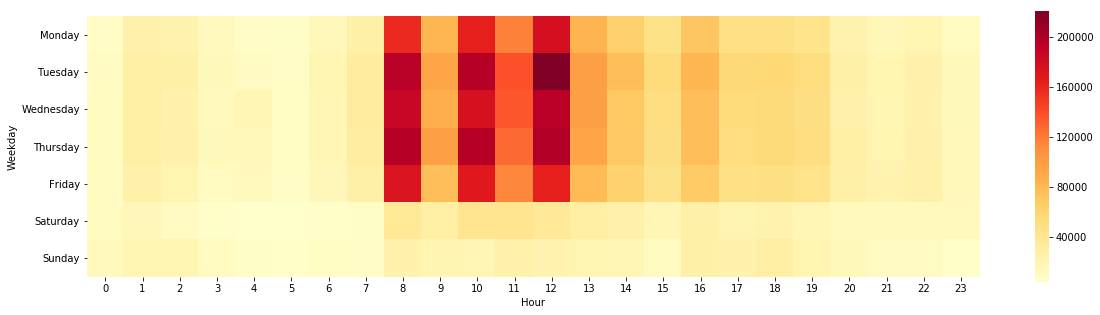

In [262]:
# https://www.freecodecamp.org/news/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51/
# https://dfrieds.com/data-visualizations/when-use-heatmaps
all_tickets = parking_data_clean.groupby(['Weekday', 'Hour']).size().reset_index(name = 'count')

# Create a custom sort since it sort by alphabetical order by default
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
all_tickets['Weekday'] = pd.Categorical(all_tickets['Weekday'],categories=weekdays)
all_tickets.sort_values('Weekday')

fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(all_tickets.pivot('Weekday', 'Hour', 'count'), square=True, cmap='YlOrRd')

## Numbers of tickets per day every month

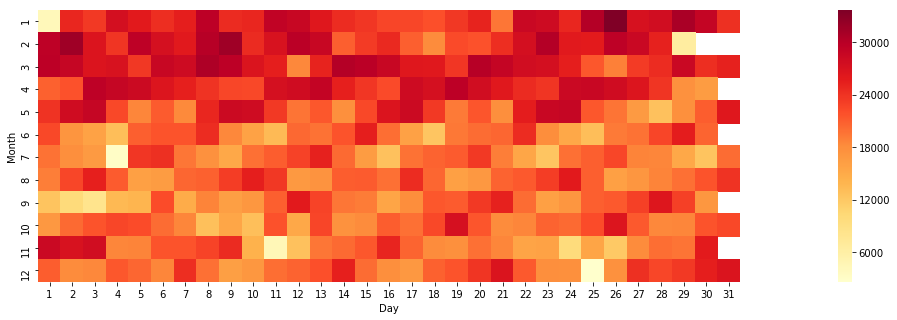

In [261]:
all_tickets_monthly = parking_data_clean.groupby(['Month', 'Day']).size().reset_index(name = 'count')
fig, ax = plt.subplots(figsize=(35,5))
sns.heatmap(all_tickets_monthly.pivot('Month', 'Day', 'count'), square=True, cmap='YlOrRd')

## Top reason parking tickets are issued
We will limit the display to the top 7 violations since there are too many values to be displayed properly

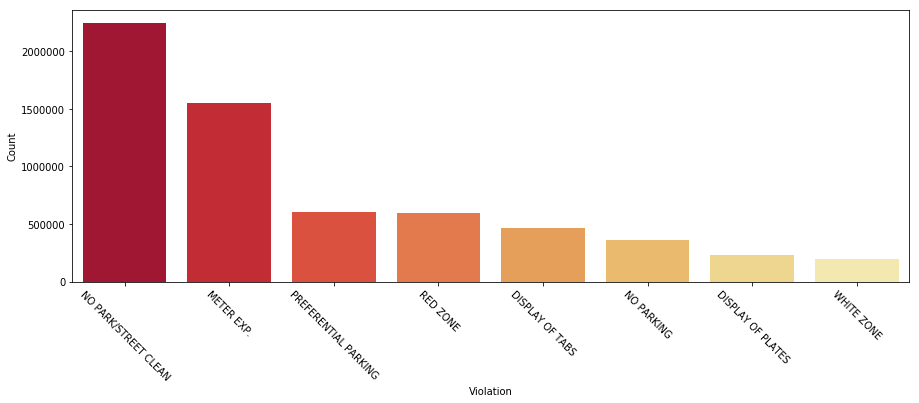

In [287]:
fig, ax = plt.subplots(figsize=(15,5))

all_violation = parking_data_clean['Violation Description'].value_counts().rename_axis('Violation').reset_index(name='Count').head(8)

all_violation_plot = sns.barplot(data=all_violation, 
            x='Violation', 
            y='Count', 
            palette='YlOrRd_r')

# Rotate the x label to 45 degrees
all_violation_plot.set_xticklabels(all_violation_plot.get_xticklabels(), rotation=-45)

all_violation_plot

In [294]:
parking_data_clean['Violation Description'].value_counts().head(25)

NO PARK/STREET CLEAN              2247878
METER EXP.                        1551970
PREFERENTIAL PARKING               604981
RED ZONE                           594149
DISPLAY OF TABS                    467419
NO PARKING                         361394
DISPLAY OF PLATES                  231119
WHITE ZONE                         192784
PARKED OVER TIME LIMIT             167186
NO STOP/STANDING                   147690
PARKED OVER TIME LIM               111382
STANDNG IN ALLEY                   100570
BLOCKING DRIVEWAY                   99248
YELLOW ZONE                         86851
STOP/STAND PROHIBIT                 86740
NO STOP/STAND                       82050
PARKED ON SIDEWALK                  67170
FIRE HYDRANT                        63986
18 IN. CURB/2 WAY                   63566
NO STOPPING/ANTI-GRIDLOCK ZONE      58296
EXCEED 72HRS-ST                     57456
OUTSIDE LINES/METER                 54722
DOUBLE PARKING                      54219
OFF STR/OVERTIME/MTR              

## When "NO PARK/STREET CLEAN" tickets are given?

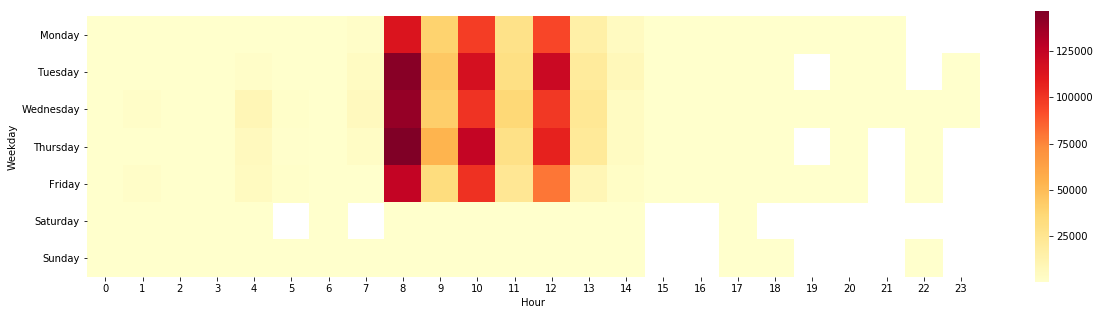

In [302]:
# Filter out reason
street_clean = parking_data_clean[(parking_data_clean['Violation Description'] == 'NO PARK/STREET CLEAN')]

# Grouping
street_clean_group = street_clean.groupby(['Weekday', 'Hour']).size().reset_index(name = 'count')

# Sorting weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
street_clean_group['Weekday'] = pd.Categorical(street_clean_group['Weekday'],categories=weekdays)
street_clean_group.sort_values('Weekday')

# Create heatmap
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(street_clean_group.pivot('Weekday', 'Hour', 'count'), square=True, cmap='YlOrRd')

## When "METER EXP. " tickets are given?

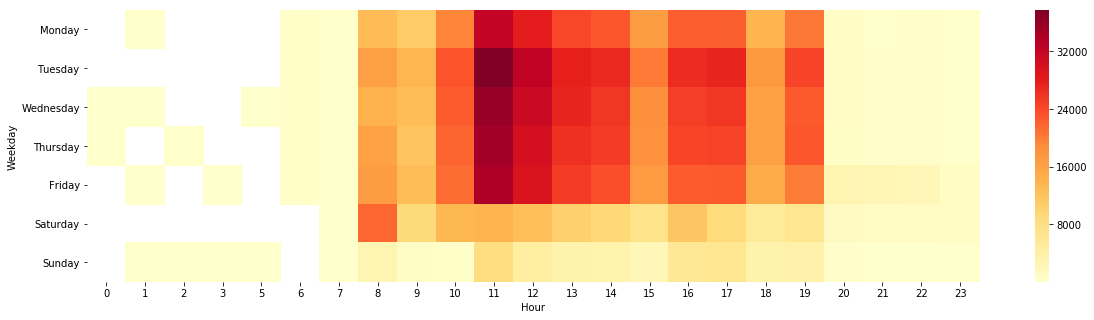

In [336]:
# Filter out reason
meter_exp = parking_data_clean[(parking_data_clean['Violation Description'] == 'METER EXP.')]

# Grouping
meter_exp_group = meter_exp.groupby(['Weekday', 'Hour']).size().reset_index(name = 'count')

# Sorting weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
meter_exp_group['Weekday'] = pd.Categorical(meter_exp_group['Weekday'],categories=weekdays)
meter_exp_group.sort_values('Weekday')

# Create heatmap
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(meter_exp_group.pivot('Weekday', 'Hour', 'count'), square=True, cmap='YlOrRd')

## When are tickets related to no parking issued?

We will combine all the reasons related to parking at an innapropriate spot together:
```
PREFERENTIAL PARKING               604981
RED ZONE                           594149
NO PARKING                         361394
WHITE ZONE                         192784
YELLOW ZONE                         86851
```

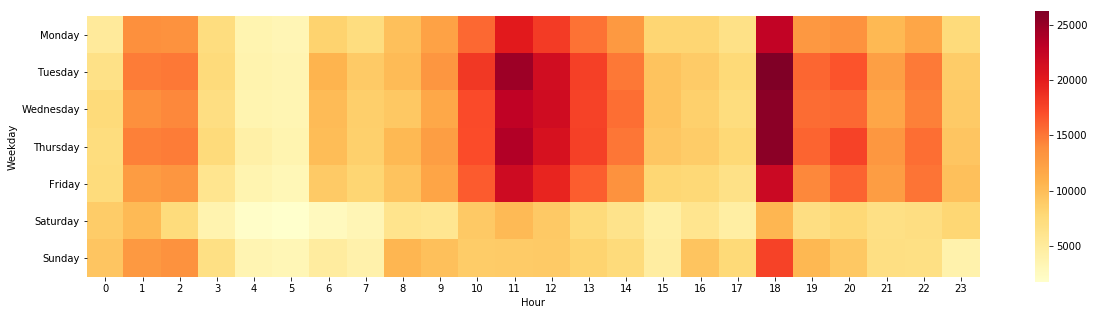

In [338]:
# Filter out reason
no_park_mix = parking_data_clean[(parking_data_clean['Violation Description'] == 'PREFERENTIAL PARKING') |
                                (parking_data_clean['Violation Description'] == 'RED ZONE') |
                                (parking_data_clean['Violation Description'] == 'NO PARKING') |
                                (parking_data_clean['Violation Description'] == 'WHITE ZONE') |
                                (parking_data_clean['Violation Description'] == 'YELLOW ZONE')]

# Grouping
no_park_mix_group = no_park_mix.groupby(['Weekday', 'Hour']).size().reset_index(name = 'count')

# Sorting weekdays
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
no_park_mix_group['Weekday'] = pd.Categorical(no_park_mix_group['Weekday'],categories=weekdays)
no_park_mix_group.sort_values('Weekday')

# Create heatmap
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(no_park_mix_group.pivot('Weekday', 'Hour', 'count'), square=True, cmap='YlOrRd')

## Population and the number of tickets given

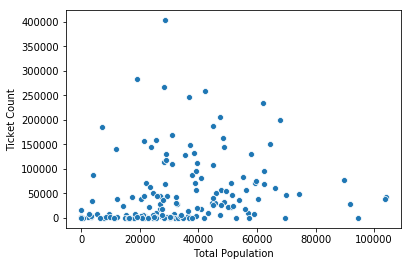

In [350]:
sns.scatterplot(data=population_zip_merge, x='Total Population', y='Ticket Count')

## Total household and the number of tickets given

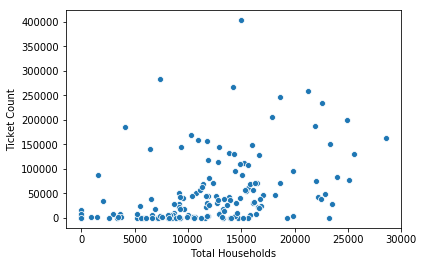

In [351]:
sns.scatterplot(data=population_zip_merge, x='Total Households', y='Ticket Count')

## Average household size and the number of tickets given

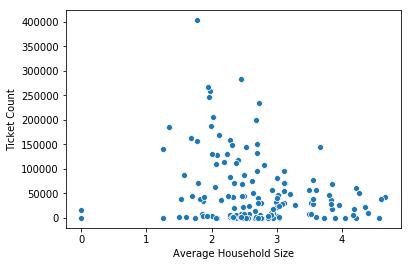

In [352]:
sns.scatterplot(data=population_zip_merge, x='Average Household Size', y='Ticket Count')

## Median age and the number of tickets given

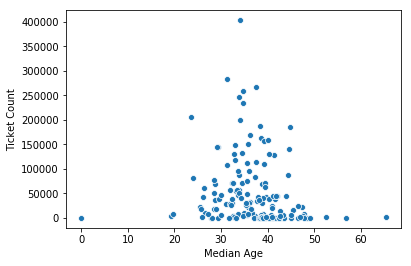

In [354]:
sns.scatterplot(data=population_zip_merge, x='Median Age', y='Ticket Count')

## Zip density and the number of ticket given

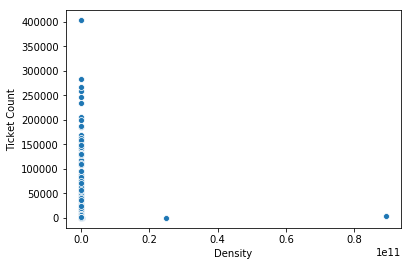

In [314]:
density_plot = sns.scatterplot(data=population_zip_merge, x='Density', y='Ticket Count')
#g.set(ylim=(0, None))

We notice that there are a few extremes in the scatter plot. We will investigate further

In [325]:
population_zip_merge[(population_zip_merge['Density'] > 100000)]

,Zip Code,geometry,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size,Area,Ticket Count,Density
65,90211,(POLYGON ((6447383.714469843 1845506.857386686...,8434,40.600,3849,4585,3706,2.280,0.002,1181,5248256.078
66,90212,(POLYGON ((6441449.368841098 1847015.242877736...,11555,41.200,5211,6344,5567,2.080,0.003,846,3301721.010
68,90232,"(POLYGON ((6445793.17607934 1833768.371703727,...",15149,38.600,7333,7816,6605,2.280,0.119,6199,127286.701
69,90245,"(POLYGON ((6446779.35058923 1797322.412587937,...",16654,39.200,8304,8350,7085,2.340,0.026,643,637295.363
72,90262,"(POLYGON ((6493244.2907632 1797859.278267525, ...",69745,27.800,33919,35826,14669,4.570,0.001,142,105219883.835
73,90265,(POLYGON ((6364174.592873313 1850179.233543677...,18116,46.500,9159,8957,7174,2.390,0.149,51,121412.139
75,90280,(POLYGON ((6500827.236664671 1799170.432413563...,94396,29.400,46321,48075,23278,4.050,0.008,368,11295076.024
77,90301,(POLYGON ((6449436.304557998 1803631.704808267...,36568,32.600,17633,18935,11895,3.010,0.000,3277,89190243902.439
78,90302,"(POLYGON ((6449450.01687774 1812051.037272357,...",29415,32.800,13803,15612,10684,2.740,0.007,1433,3940990.319
79,90275,(POLYGON ((6448441.420797745 1744535.417232073...,41804,47.800,20283,21521,15618,2.650,0.010,118,3985174.282


There seems to be a problem with our `Area` data as some zip codes does not have an accurate area which create wrong density data. For the purpose of visualization we will remove some of those points.

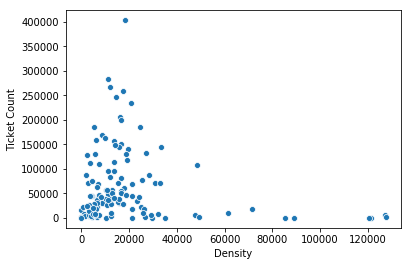

In [333]:
population_density_fix = population_zip_merge[(population_zip_merge['Density'] < 200000)]
density_plot2 = sns.scatterplot(data=population_density_fix, x='Density', y='Ticket Count')

It seems like density may not be an ideal feature for model building

## Area and the number of tickets given

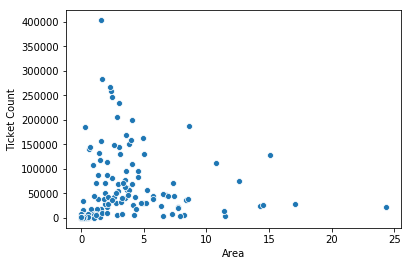

In [353]:
density_plot = sns.scatterplot(data=population_zip_merge, x='Area', y='Ticket Count')